In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [293]:
data = pd.read_csv("./input/project/Employee.csv")

In [294]:
df = pd.DataFrame(data)

In [295]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [297]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [298]:
df.duplicated().sum()

1889

In [299]:
df['LeaveOrNot'].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

<Axes: xlabel='LeaveOrNot', ylabel='count'>

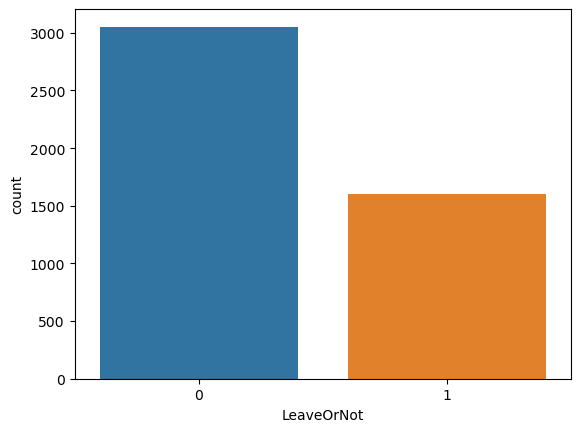

In [300]:
sns.countplot(data=df, x='LeaveOrNot')

In [301]:
df['Education'].value_counts()

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

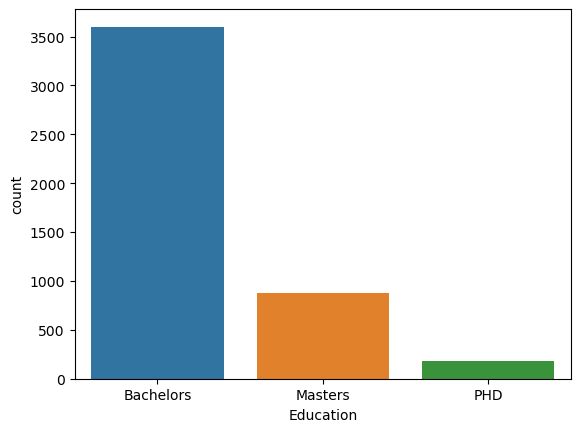

In [302]:
sns.countplot(data=df, x='Education')

In [221]:
df['City'].value_counts()

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

<Axes: xlabel='City', ylabel='count'>

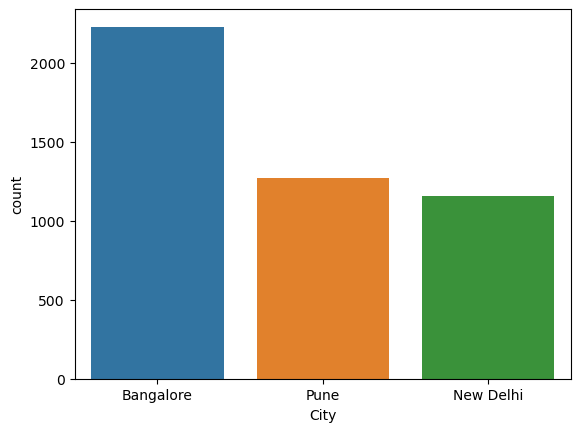

In [303]:
sns.countplot(data=df, x='City')

In [222]:
df['PaymentTier'].value_counts()

PaymentTier
3    3492
2     918
1     243
Name: count, dtype: int64

In [223]:
df['EverBenched'].value_counts()

EverBenched
No     4175
Yes     478
Name: count, dtype: int64

<Axes: xlabel='EverBenched', ylabel='count'>

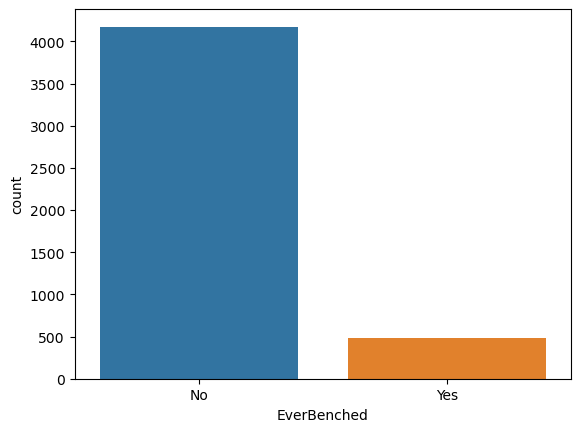

In [304]:
sns.countplot(data=df, x='EverBenched')

In [224]:
categorical_features = df.select_dtypes(include=['object']).columns

In [225]:
categorical_features

Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')

In [305]:
df = pd.get_dummies(data=df, columns=categorical_features, drop_first=True, dtype=int)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   PaymentTier                4653 non-null   int64
 2   Age                        4653 non-null   int64
 3   ExperienceInCurrentDomain  4653 non-null   int64
 4   LeaveOrNot                 4653 non-null   int64
 5   Education_Masters          4653 non-null   int32
 6   Education_PHD              4653 non-null   int32
 7   City_New Delhi             4653 non-null   int32
 8   City_Pune                  4653 non-null   int32
 9   Gender_Male                4653 non-null   int32
 10  EverBenched_Yes            4653 non-null   int32
dtypes: int32(6), int64(5)
memory usage: 290.9 KB


In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, shuffle=True)

In [313]:
X_train.columns

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'Education_Masters', 'Education_PHD', 'City_New Delhi', 'City_Pune',
       'Gender_Male', 'EverBenched_Yes'],
      dtype='object')

In [314]:
from sklearn.preprocessing import StandardScaler

std =  StandardScaler()

X_train[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']] = std.fit_transform(X_train[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']])
X_test[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']] = std.transform(X_test[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']])

In [316]:
X_train

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
3847,1.042800,0.540895,1.175170,-1.877591,0,0,0,0,1,1
2197,0.505075,0.540895,-0.072460,-0.593078,1,0,0,1,1,0
4532,1.042800,0.540895,-0.072460,0.049179,0,1,1,0,1,0
704,1.042800,0.540895,-0.696275,0.691435,0,0,0,0,0,0
2665,1.042800,0.540895,0.135478,1.333691,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
683,-1.108101,-1.242286,-1.112151,-0.593078,1,0,1,0,1,0
2123,-1.645827,-1.242286,-0.280398,-0.593078,0,0,0,1,1,0
1304,-1.645827,0.540895,-0.904213,0.049179,0,0,0,0,1,0
4228,0.505075,0.540895,0.759293,0.049179,0,0,0,0,0,0


In [317]:
from sklearn.linear_model import LogisticRegression

In [318]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

LogisticRegression()

In [319]:
model_lr.score(X_test, y_test)

0.7357679914070892

In [320]:
predictions_lr = model_lr.predict(X_test)

In [321]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [322]:
accuracy_score(y_test, predictions_lr)

0.7357679914070892

In [330]:
classification_report(predictions_lr , y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.77      0.82       730\n           1       0.42      0.62      0.50       201\n\n    accuracy                           0.74       931\n   macro avg       0.65      0.69      0.66       931\nweighted avg       0.78      0.74      0.75       931\n'

In [331]:
from sklearn.ensemble import RandomForestClassifier

In [332]:
model_rf = RandomForestClassifier()

In [333]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [334]:
model_rf.score(X_test, y_test)

0.8388829215896885

In [335]:
predictions_rf = model_rf.predict(X_test)

In [337]:
classification_report(y_test, predictions_rf)

'              precision    recall  f1-score   support\n\n           0       0.87      0.90      0.88       638\n           1       0.77      0.70      0.73       293\n\n    accuracy                           0.84       931\n   macro avg       0.82      0.80      0.81       931\nweighted avg       0.84      0.84      0.84       931\n'

In [340]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [341]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 

opt = Adam(0.0001)

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [342]:
# #Adding an early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy',
                   mode='max', 
                   patience=10
                  )

In [344]:
NN_Classifier = model.fit(X_train.values, y_train.values,
                          epochs=50,
                          callbacks=[es],
                          validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 1s 5ms/step - loss: 0.5559 - accuracy: 0.7272 - val_loss: 0.5197 - val_accuracy: 0.7584
Epoch 2/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7837 - val_loss: 0.4871 - val_accuracy: 0.7718
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.8048 - val_loss: 0.4774 - val_accuracy: 0.7960
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8176 - val_loss: 0.4595 - val_accuracy: 0.8107
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8287 - val_loss: 0.4411 - val_accuracy: 0.8215
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8378 - val_loss: 0.4309 - val_accuracy: 0.8215
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8421 - val_loss: 0.4285 - val_accuracy: 0.8255
Epoch 8/50
94/94 [==

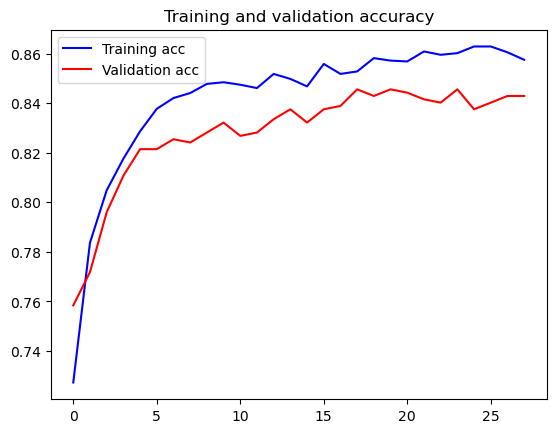

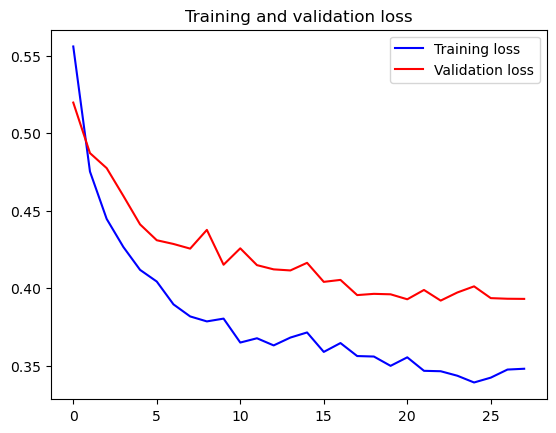

In [345]:
acc = NN_Classifier.history['accuracy']
val_acc = NN_Classifier.history['val_accuracy']
loss = NN_Classifier.history['loss']
val_loss = NN_Classifier.history['val_loss']     

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()    